In [25]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

from KETIPrePartialDataPreprocessing import main

inputType ='influx' # or file
refine_param = {
    "removeDuplication":{"flag":True},
    "staticFrequency":{"flag":True}
}
outlier_param  = {
    "certainOutlierToNaN":{"flag":True},
    "uncertainOutlierToNaN":{
        "flag":True,
        "param":{"neighbor":[0.4,0.2]}
    },
    "data_type":"air"
}
imputation_param = {
    "serialImputation":{
        "flag":False,
        "imputation_method":[{"min":0,"max":50,"method":"linear"}],
        "totalNanLimit":70
    }
}

In [26]:
# Declare your own data
input_data = main.inputControl(inputType)
# Make noise
import numpy as np
input_test_data = input_data.replace(4.0, np.nan)

In [27]:
# Preprocessing
from KETIPrePartialDataPreprocessing import data_preprocessing
column_name = input_test_data.columns[1]
output = data_preprocessing.ByAllMethod(input_test_data[[column_name]][383:389], refine_param, outlier_param, imputation_param)

0.4 0.2
36.66666666666667 18.333333333333336
{Timestamp('2021-02-04 17:14:00+0000', tz='UTC', freq='T')}


key:  original Data Leangth: 6 Data NaN Length: in_cici    0
dtype: int64


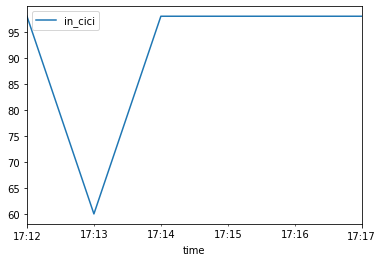

key:  refined_data Data Leangth: 6 Data NaN Length: in_cici    0
dtype: int64


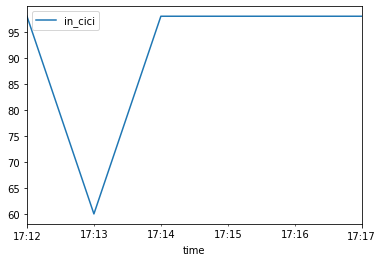

key:  datawithMoreCertainNaN Data Leangth: 6 Data NaN Length: in_cici    0
dtype: int64


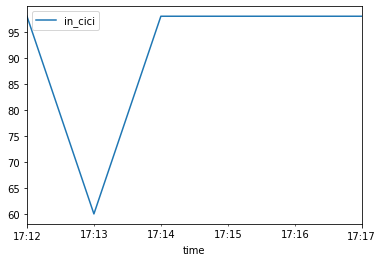

key:  datawithMoreUnCertainNaN Data Leangth: 6 Data NaN Length: in_cici    0
dtype: int64


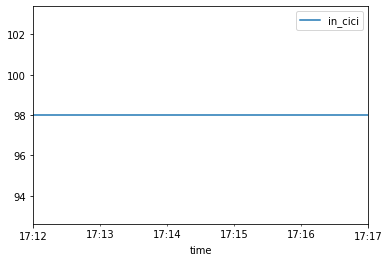

key:  imputed_data Data Leangth: 6 Data NaN Length: in_cici    0
dtype: int64


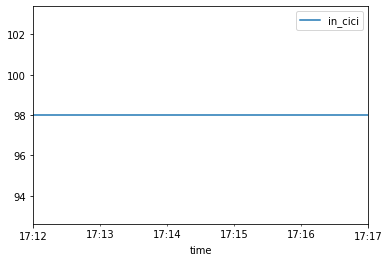

In [28]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    temp.plot()
    plt.show()